<a href="https://colab.research.google.com/github/shahin-ro/Heart-Disease-Analysis/blob/main/Heart_Disease_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Import Libraries**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import numpy as np
from flask import Flask

#**Read the File and then show it**

In [3]:
df = pd.read_csv('/content/heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


#**Show type , number of rows , columns and nulls**

In [4]:
df.shape , df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


((918, 12), None)

#**Convert objects into numbers**

In [5]:
encoder = LabelEncoder()
df[['Sex' , 'ChestPainType', 'RestingECG', 'ExerciseAngina' , 'ST_Slope']] = df[[ 'Sex' , 'ChestPainType' , 'RestingECG' , 'ExerciseAngina' , 'ST_Slope']].apply(encoder.fit_transform)

#**Get correlation**
**(If they're closer to 1 or -1 , it means that they're related to each other)**

In [6]:
df.corr()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,1.000000,0.055750,-0.077150,0.254399,-0.095282,0.198039,-0.007484,-0.382045,0.215793,0.258612,-0.268264,0.282039
Sex,0.055750,1.000000,-0.126559,0.005133,-0.200092,0.120076,0.071552,-0.189186,0.190664,0.105734,-0.150693,0.305445
ChestPainType,-0.077150,-0.126559,1.000000,-0.020647,0.067880,-0.073151,-0.072537,0.289123,-0.354727,-0.177377,0.213521,-0.386828
RestingBP,0.254399,0.005133,-0.020647,1.000000,0.100893,0.070193,0.022656,-0.112135,0.155101,0.164803,-0.075162,0.107589
Cholesterol,-0.095282,-0.200092,0.067880,0.100893,1.000000,-0.260974,-0.196544,0.235792,-0.034166,0.050148,0.111471,-0.232741
FastingBS,0.198039,0.120076,-0.073151,0.070193,-0.260974,1.000000,0.087050,-0.131438,0.060451,0.052698,-0.175774,0.267291
RestingECG,-0.007484,0.071552,-0.072537,0.022656,-0.196544,0.087050,1.000000,-0.179276,0.077500,-0.020438,-0.006778,0.057384
MaxHR,-0.382045,-0.189186,0.289123,-0.112135,0.235792,-0.131438,-0.179276,1.000000,-0.370425,-0.160691,0.343419,-0.400421
ExerciseAngina,0.215793,0.190664,-0.354727,0.155101,-0.034166,0.060451,0.077500,-0.370425,1.000000,0.408752,-0.428706,0.494282
Oldpeak,0.258612,0.105734,-0.177377,0.164803,0.050148,0.052698,-0.020438,-0.160691,0.408752,1.000000,-0.501921,0.403951


#**Drop columns that have little related with HeartDisease**

In [7]:
df1 = df.drop(columns=['RestingBP','FastingBS','RestingECG','Age'])
df1

,Sex,ChestPainType,Cholesterol,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,1,1,289,172,0,0.0,2,0
1,0,2,180,156,0,1.0,1,1
2,1,1,283,98,0,0.0,2,0
3,0,0,214,108,1,1.5,1,1
4,1,2,195,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...
913,1,3,264,132,0,1.2,1,1
914,1,0,193,141,0,3.4,1,1
915,1,0,131,115,1,1.2,1,1
916,0,1,236,174,0,0.0,1,1


#**How does cholesterol columns have zero and other numbers**

In [8]:
df1['Cholesterol'].value_counts()

,count
Cholesterol,
0,172
254,11
223,10
220,10
230,9
...,...
392,1
316,1
153,1


#**Convert zero Cholesterols to average Cholesterols**

In [9]:
df1['Cholesterol'] = df1['Cholesterol'].replace(0, df1['Cholesterol'][df1['Cholesterol'] != 0].mean())

#**Scatter and the number of people based on Cholesterol level**

248 people have normal Cholesterol level 
189 people are at risk 
481 people have high CHolesterol level


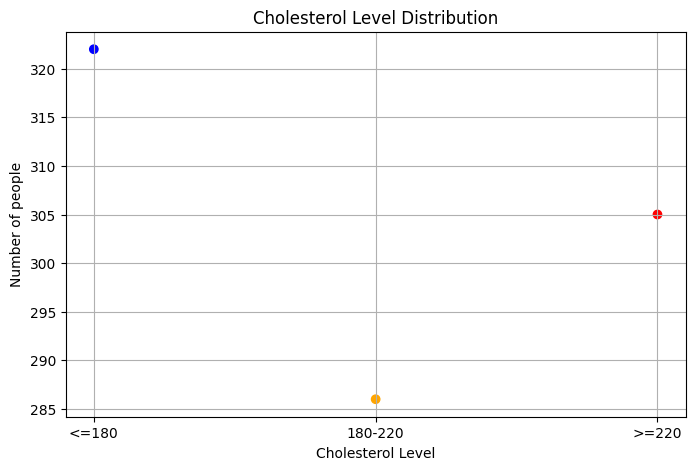

In [10]:

print(f"{(df['Cholesterol'] <= 180).sum()} people have normal Cholesterol level \n{((df['Cholesterol'] > 180) & (df['Cholesterol'] < 220)).sum()} people are at risk \n{(df['Cholesterol'] >= 220).sum()} people have high CHolesterol level")
plt.figure(figsize=(8, 5))
plt.scatter(['<=180', '180-220', '>=220'],[(df['Cholesterol'] <= 200).sum(),((df['Cholesterol'] > 200) & (df['Cholesterol'] < 250)).sum(),(df['Cholesterol'] > 250).sum()] , color=['blue', 'orange', 'red'])
plt.title('Cholesterol Level Distribution')
plt.xlabel('Cholesterol Level')
plt.ylabel('Number of people')
plt.grid()
plt.show()

#**The correlation and it's number on the graph**

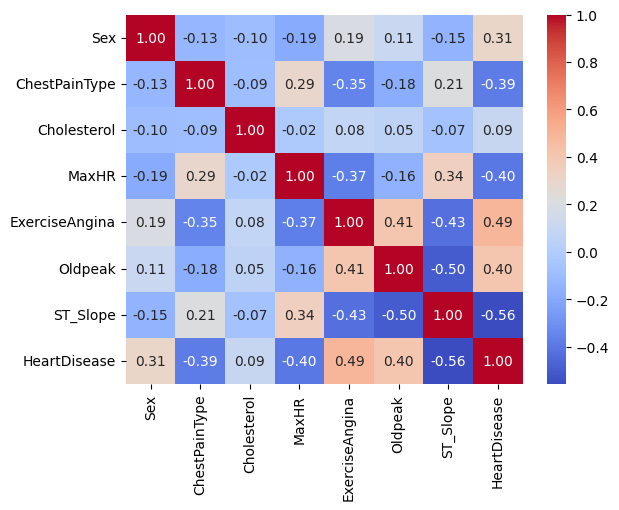

,Sex,ChestPainType,Cholesterol,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Sex,1.000000,-0.126559,-0.101706,-0.189186,0.190664,0.105734,-0.150693,0.305445
ChestPainType,-0.126559,1.000000,-0.092681,0.289123,-0.354727,-0.177377,0.213521,-0.386828
Cholesterol,-0.101706,-0.092681,1.000000,-0.017239,0.077549,0.053029,-0.069723,0.094071
MaxHR,-0.189186,0.289123,-0.017239,1.000000,-0.370425,-0.160691,0.343419,-0.400421
ExerciseAngina,0.190664,-0.354727,0.077549,-0.370425,1.000000,0.408752,-0.428706,0.494282
Oldpeak,0.105734,-0.177377,0.053029,-0.160691,0.408752,1.000000,-0.501921,0.403951
ST_Slope,-0.150693,0.213521,-0.069723,0.343419,-0.428706,-0.501921,1.000000,-0.558771
HeartDisease,0.305445,-0.386828,0.094071,-0.400421,0.494282,0.403951,-0.558771,1.000000


In [11]:
corr = df1.corr()
sns.heatmap(corr,cmap="coolwarm",annot=True,fmt=".2f")
plt.show()
df1.corr()

#**Pairplot**

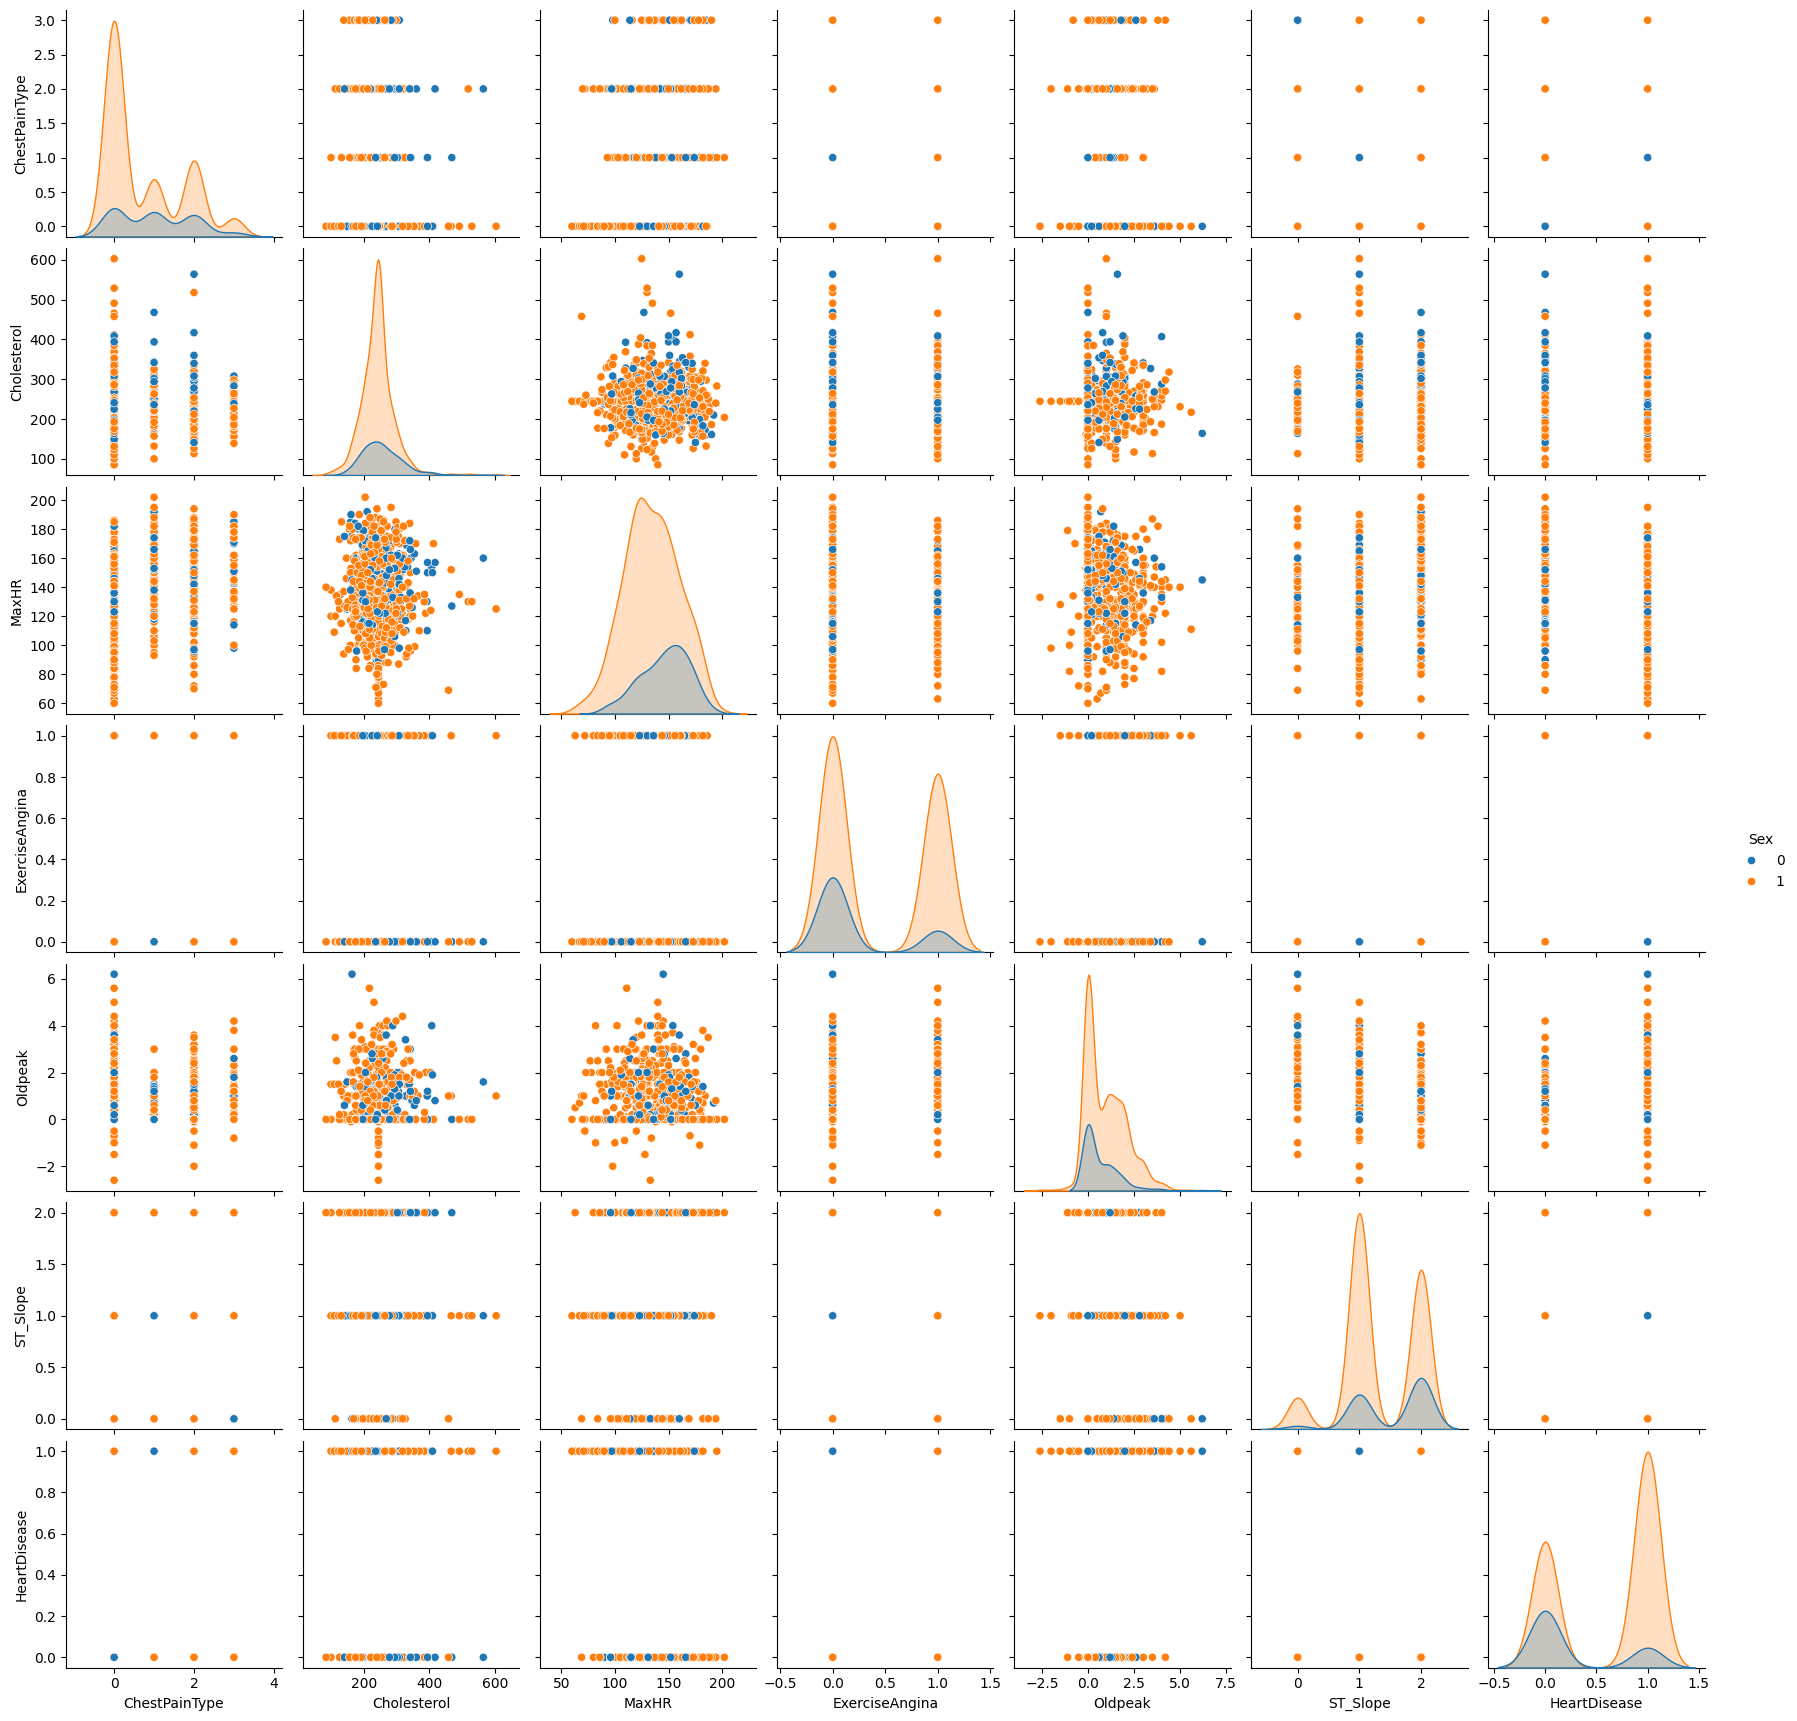

In [12]:
sns.pairplot(df1,hue='Sex')
plt.show()

#**Scatter of people based on Heart Disease and Cholesterol level**

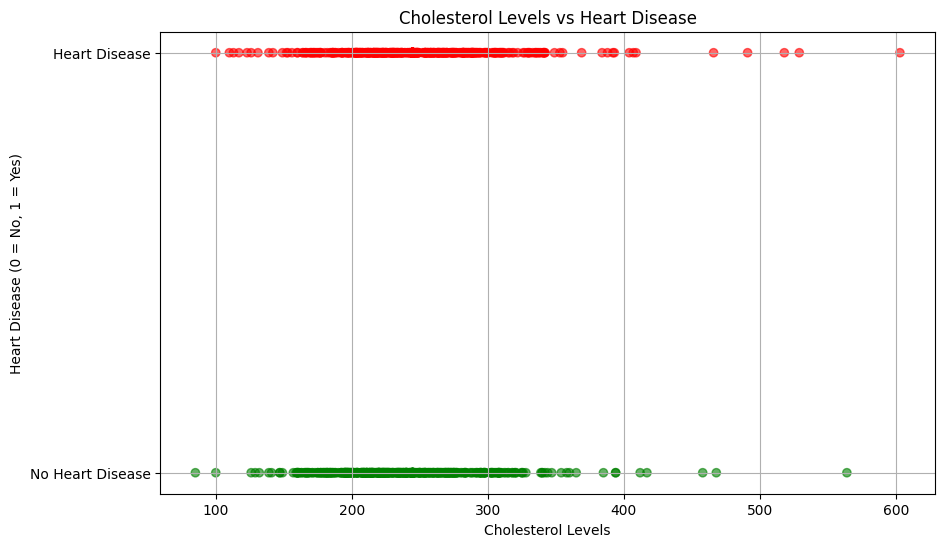

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(df1['Cholesterol'], df1['HeartDisease'], alpha=0.6, c=np.where(df1['HeartDisease'] == 0, 'green', 'red'))
plt.title('Cholesterol Levels vs Heart Disease')
plt.xlabel('Cholesterol Levels')
plt.ylabel('Heart Disease (0 = No, 1 = Yes)')
plt.yticks([0, 1], ['No Heart Disease', 'Heart Disease'])
plt.grid(which='both')
plt.show()

#**Create Api of that Dataframe**

In [21]:
app = Flask(__name__)
@app.route("/get-json")
def json_heart():
  return df1.to_json("Heart.json")
@app.route("/get-csv")
def csv_heart():
  return df1.to_csv("Heart.csv")
app.run(port=80)

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:80
INFO:werkzeug:Press CTRL+C to quit


**Powered by Shahin**